In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import tensorflow as tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8852\2097447090.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [83]:
df = pd.read_csv('forestfires.csv')
df


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


array([[<AxesSubplot: title={'center': 'area'}>]], dtype=object)

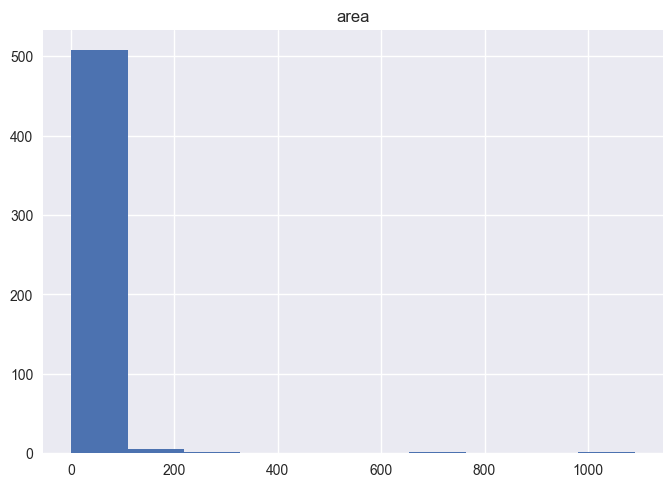

In [84]:
df.hist(column='area')

In [85]:
df['size_category'] = np.where(df['area']>6, '1', '0')
df.tail(10)
     

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
507,2,4,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,0
508,1,2,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,0
509,5,4,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17,0
510,6,5,aug,fri,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43,0
511,8,6,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.00,0
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00,0


<AxesSubplot: xlabel='size_category', ylabel='count'>

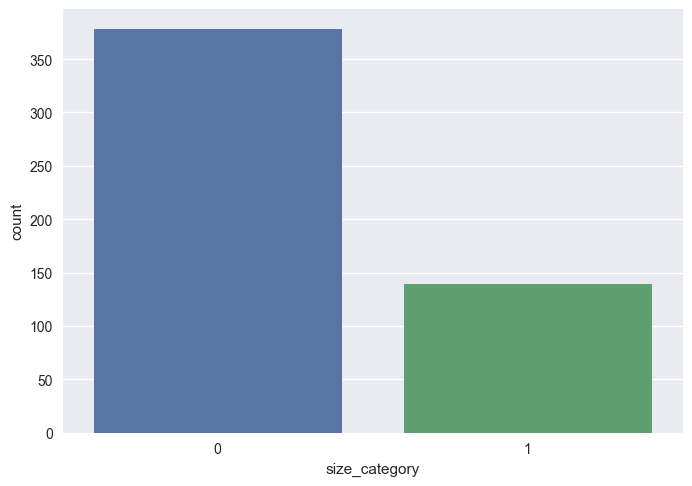

In [86]:
sns.countplot(x="size_category", data=df)
     

In [87]:
df['size_category']=pd.to_numeric(df['size_category'])

In [88]:
print('Total Data:', df.shape[0])
print('Total Features:', df.shape[1])

Total Data: 517
Total Features: 14


In [89]:

df.isnull().sum()

X                0
Y                0
month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [90]:

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8852\2515665730.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


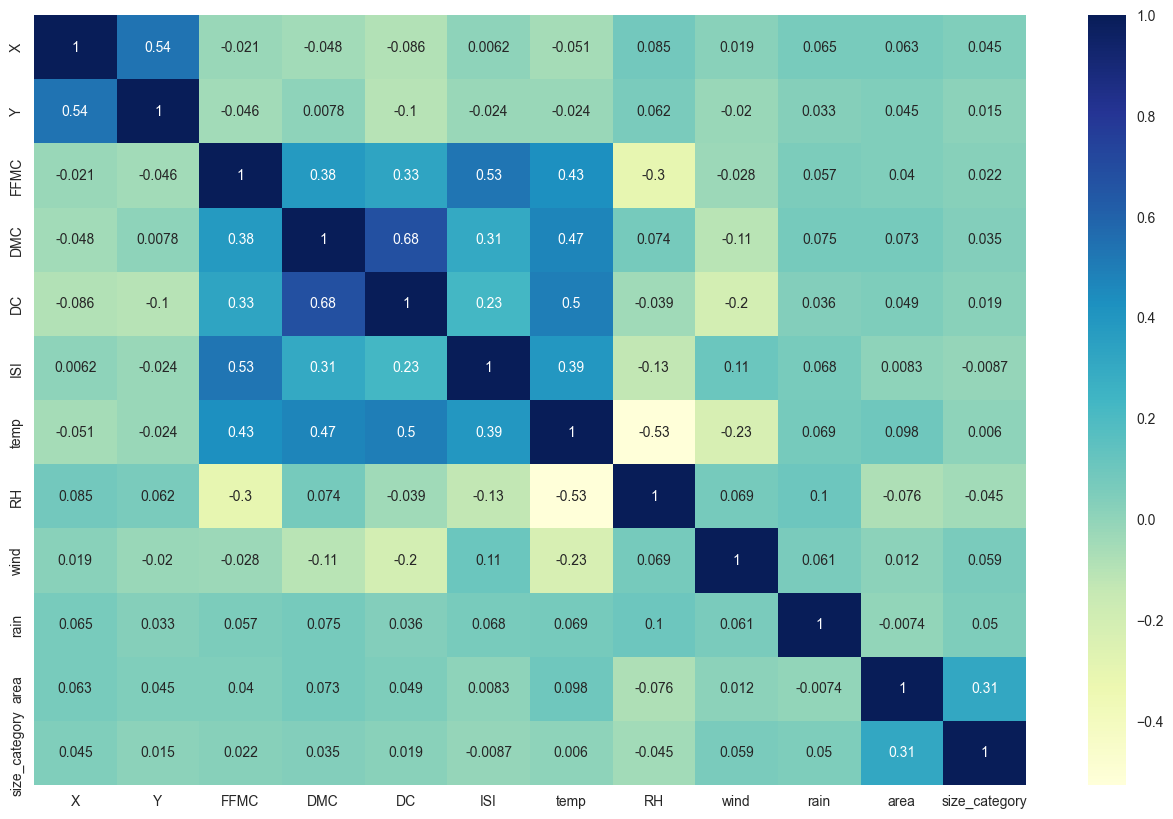

In [91]:
fig, ax = plt.subplots(figsize=(16,10))  
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

Text(0.5, 1.0, 'Count plot of months')

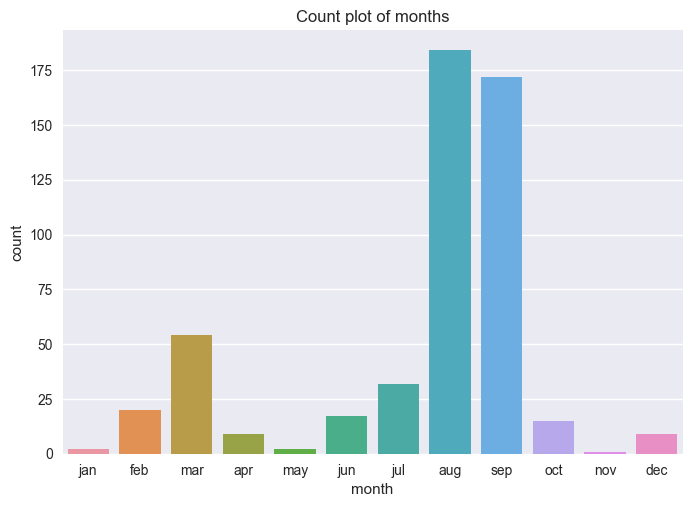

In [92]:
df['month'] = pd.Categorical(df['month'], categories=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
sns.countplot(x='month', data=df)
plt.title('Count plot of months')


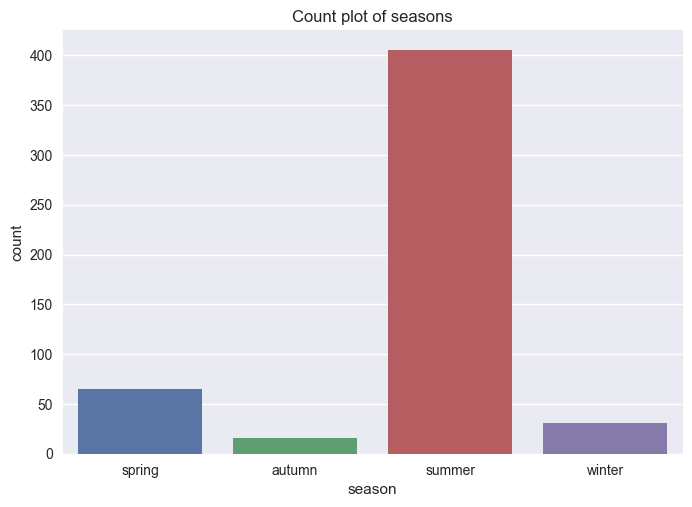

In [93]:
# dictionary of months mapping to seasons
season_dict = {'dec': 'winter', 'jan': 'winter', 'feb': 'winter',
               'mar': 'spring', 'apr': 'spring', 'may': 'spring',
               'jun': 'summer', 'jul': 'summer', 'aug': 'summer', 'sep': 'summer',
               'oct': 'autumn', 'nov': 'autumn'}

# Check if the 'month' column exists in the DataFrame
if 'month' in df.columns:
    # create a new column 'season' by mapping 'month' column using the season_dict
    df['season'] = df['month'].map(season_dict)

    # visualize data
    sns.countplot(data=df, x='season')
    plt.title('Count plot of seasons')

    # display the plot
    plt.show()
else:
    print("The 'month' column does not exist in the DataFrame.")

In [94]:
df['season'].value_counts()

summer    405
spring     65
winter     31
autumn     16
Name: season, dtype: int64

Text(0.5, 1.0, 'Count plot of summer vs other seasons')

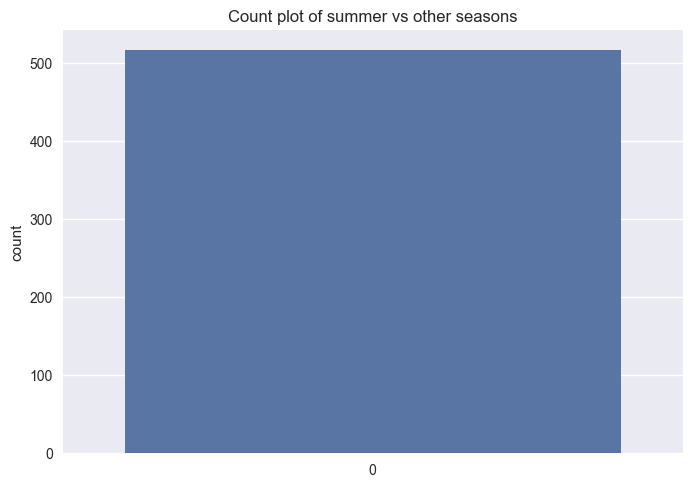

In [95]:
# converting to is summer
df['season'] = (df['season'] == 'summer')

# renaming column
df = df.rename(columns = {'season' : 'is_summer'})

# visualizing data
sns.countplot(df['is_summer'])
plt.title('Count plot of summer vs other seasons')

Text(0.5, 1.0, 'Count plot of days')

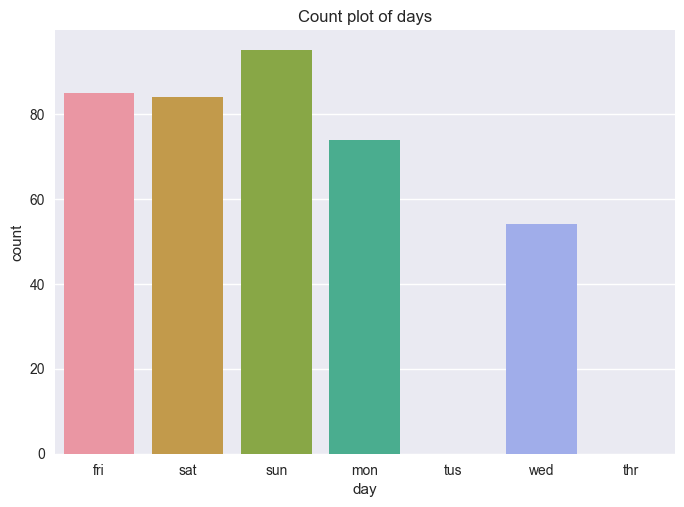

In [96]:
df['day'] = pd.Categorical(df['day'], categories=['fri', 'sat', 'sun','mon', 'tus', 'wed', 'thr'])
sns.countplot(x='day', data=df)
# sns.countplot(df['day'])
plt.title('Count plot of days')

Text(0.5, 1.0, 'Count plot of weekend vs weekday')

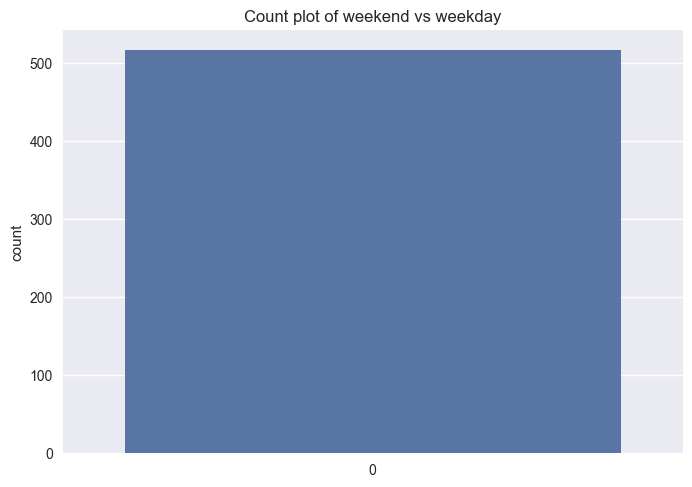

In [97]:
# converting to is weekend
df['day'] = ((df['day'] == 'sun') | (df['day'] == 'sat') | (df['day'] == 'fri'))

# renaming column
df = df.rename(columns = {'day' : 'is_weekend'})

# visualizing
sns.countplot(df['is_weekend'])
plt.title('Count plot of weekend vs weekday')

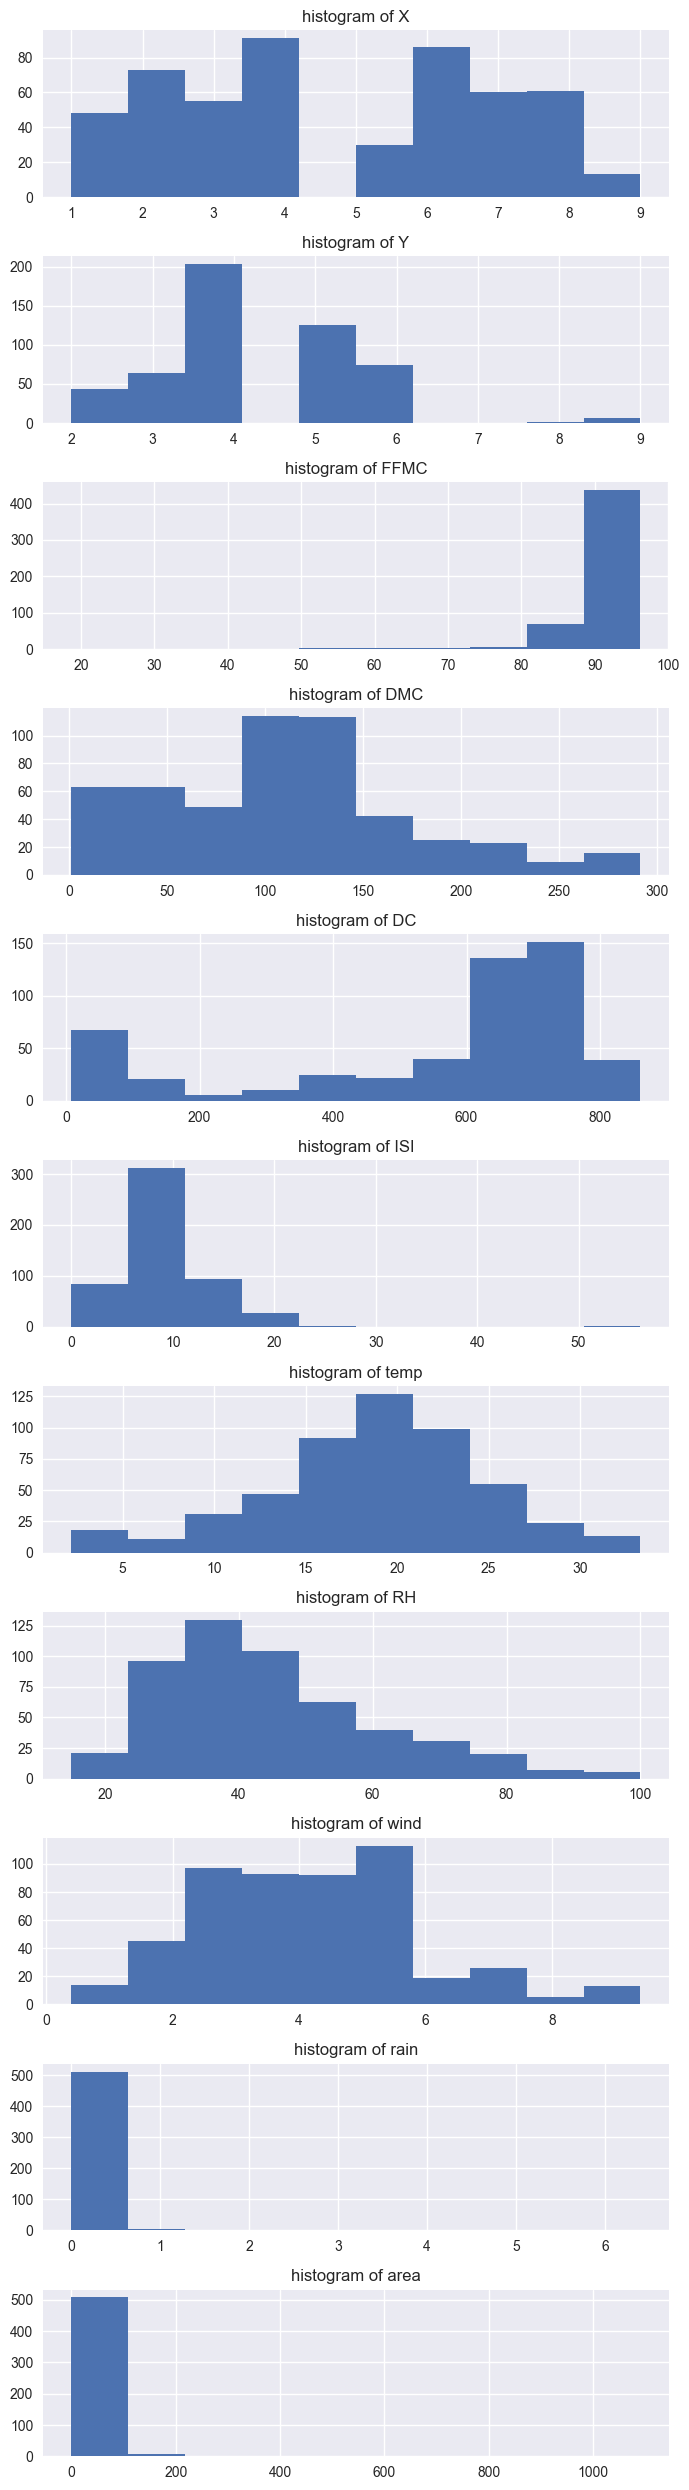

In [98]:
# subplots
fig, ax = plt.subplots(11, figsize = (7,25))

# initial index
index = 0
unused_column = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

# visualizing
for column in unused_column:
    if column != 'is_summer':
        ax[index].hist(df[column])
        ax[index].title.set_text('histogram of ' + column)
        index += 1

# making plots visible
plt.tight_layout()

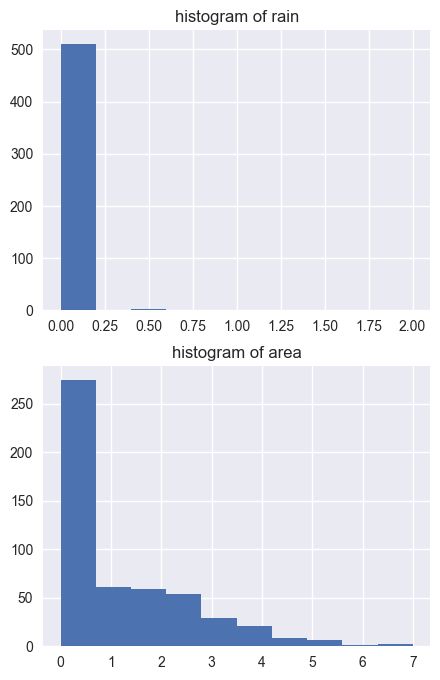

In [99]:
# natural logarithm scaling (+1 to prevent errors at 0)
df.loc[:, ['rain', 'area']] = df.loc[:, ['rain', 'area']].apply(lambda x: np.log(x + 1), axis = 1)

# visualizing
fig, ax = plt.subplots(2, figsize = (5, 8))

ax[0].hist(df['rain'])
ax[0].title.set_text('histogram of rain')

ax[1].hist(df['area'])
ax[1].title.set_text('histogram of area')

In [100]:
features = df.drop(['area'], axis = 1)
labels = df['area'].values.reshape(-1, 1)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    labels,
                                                    test_size = 0.2,
                                                    random_state = 42)

X_train
# X_train = df.drop(['month'], axis = 1)

,X,Y,month,is_weekend,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category,is_summer
329,4,3,sep,True,92.2,102.3,751.5,8.4,23.5,27,4.0,0.0,0,True
173,4,4,sep,False,90.9,126.5,686.5,7.0,17.7,39,2.2,0.0,0,True
272,2,5,aug,False,92.1,152.6,658.2,14.3,20.2,47,4.0,0.0,0,True
497,3,4,aug,False,96.1,181.1,671.2,14.3,32.3,27,2.2,0.0,1,True
182,5,4,feb,True,86.8,15.6,48.3,3.9,12.4,53,2.2,0.0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,4,5,sep,True,94.3,85.1,692.3,15.9,17.7,37,3.6,0.0,0,True
106,4,5,mar,False,91.4,30.7,74.3,7.5,18.2,29,3.1,0.0,0,False
270,2,2,aug,False,92.1,152.6,658.2,14.3,21.8,56,3.1,0.0,0,True
435,2,5,jul,True,90.8,84.7,376.6,5.6,23.8,51,1.8,0.0,0,True


In [102]:
# # fitting scaler
numeric_columns = ['X', 'Y','is_summer','is_weekend','FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'size_category']

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)
sc_features = StandardScaler()

# transforming features
X_test[numeric_columns] = sc_features.fit_transform(X_test[numeric_columns])
X_train[numeric_columns] = sc_features.transform(X_train[numeric_columns])

X_train


,X,Y,month,is_weekend,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category,is_summer
329,-0.293766,-0.927776,sep,0.943880,0.342959,-0.060220,0.867158,-0.249015,0.784070,-1.071784,-0.054362,-0.137348,-0.606977,0.53287
173,-0.293766,-0.161993,sep,-1.059457,-0.057456,0.370353,0.600021,-0.465731,-0.203920,-0.279375,-1.042369,-0.137348,-0.606977,0.53287
272,-1.130796,0.603791,aug,-1.059457,0.312158,0.834731,0.483714,0.664288,0.221938,0.248898,-0.054362,-0.137348,-0.606977,0.53287
497,-0.712281,-0.161993,aug,-1.059457,1.544206,1.341810,0.537142,0.664288,2.283090,-1.071784,-1.042369,-0.137348,1.647509,0.53287
182,0.124750,-0.161993,feb,0.943880,-1.320305,-1.602809,-2.022846,-0.945602,-1.106740,0.645102,-1.042369,-0.137348,1.647509,-1.87663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-0.293766,0.603791,sep,0.943880,0.989785,-0.366247,0.623858,0.911963,-0.203920,-0.411443,-0.273919,-0.137348,-0.606977,0.53287
106,-0.293766,0.603791,mar,-1.059457,0.096550,-1.334146,-1.915992,-0.388332,-0.118749,-0.939716,-0.548365,-0.137348,-0.606977,-1.87663
270,-1.130796,-1.693559,aug,-1.059457,0.312158,0.834731,0.483714,0.664288,0.494487,0.843205,-0.548365,-0.137348,-0.606977,0.53287
435,-1.130796,0.603791,jul,0.943880,-0.088257,-0.373364,-0.673602,-0.682447,0.835173,0.513034,-1.261926,-0.137348,-0.606977,0.53287


In [103]:

# features
# X_test = pd.DataFrame(X_test[numeric_columns], columns = features.columns)
# X_train = pd.DataFrame(X_train[numeric_columns], columns = features.columns)

# # labels
# y_test = pd.DataFrame(y_test, columns = ['size_category'])
# y_train = pd.DataFrame(y_train, columns = ['size_category'])
X_train = X_train[numeric_columns]
X_test = X_test[numeric_columns]

In [104]:
X_train.head()

,X,Y,is_summer,is_weekend,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
329,-0.293766,-0.927776,0.53287,0.943880,0.342959,-0.060220,0.867158,-0.249015,0.784070,-1.071784,-0.054362,-0.137348,-0.606977
173,-0.293766,-0.161993,0.53287,-1.059457,-0.057456,0.370353,0.600021,-0.465731,-0.203920,-0.279375,-1.042369,-0.137348,-0.606977
272,-1.130796,0.603791,0.53287,-1.059457,0.312158,0.834731,0.483714,0.664288,0.221938,0.248898,-0.054362,-0.137348,-0.606977
497,-0.712281,-0.161993,0.53287,-1.059457,1.544206,1.341810,0.537142,0.664288,2.283090,-1.071784,-1.042369,-0.137348,1.647509
182,0.124750,-0.161993,-1.87663,0.943880,-1.320305,-1.602809,-2.022846,-0.945602,-1.106740,0.645102,-1.042369,-0.137348,1.647509


In [142]:
model = Sequential()

In [143]:


# input layer + 1st hidden layer
model.add(Dense(6, input_dim=13, activation='tanh', kernel_initializer = 'normal'))
# 2nd hidden layer
model.add(Dense(6, activation='tanh', kernel_initializer = 'normal'))
# output layer
model.add(Dense(6, activation='tanh', kernel_initializer = 'normal'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'linear', kernel_initializer = 'normal'))

In [144]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_136 (Dense)           (None, 6)                 84        
                                                                 
 dense_137 (Dense)           (None, 6)                 42        
                                                                 
 dense_138 (Dense)           (None, 6)                 42        
                                                                 
 dropout_34 (Dropout)        (None, 6)                 0         
                                                                 
 dense_139 (Dense)           (None, 1)                 7         
                                                                 
Total params: 175
Trainable params: 175
Non-trainable params: 0
_________________________________________________________________


In [145]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [146]:

model.compile(optimizer = 'adam', metrics=['accuracy'], loss = 'mean_squared_error')


In [147]:
history = model.fit(X_train,
                    y_train,
                    validation_data = (X_test, y_test), 
                    batch_size = 10,
                    epochs = 100)

Epoch 1/100
42/42 [==============================] - 2s 9ms/step - loss: 3.0381 - accuracy: 0.4746 - val_loss: 3.3359 - val_accuracy: 0.4904
Epoch 2/100
42/42 [==============================] - 0s 4ms/step - loss: 2.7811 - accuracy: 0.4746 - val_loss: 2.9341 - val_accuracy: 0.4904
Epoch 3/100
42/42 [==============================] - 0s 4ms/step - loss: 2.2453 - accuracy: 0.4140 - val_loss: 2.2014 - val_accuracy: 0.2404
Epoch 4/100
42/42 [==============================] - 0s 4ms/step - loss: 1.6888 - accuracy: 0.1380 - val_loss: 1.7533 - val_accuracy: 0.1250
Epoch 5/100
42/42 [==============================] - 0s 4ms/step - loss: 1.3997 - accuracy: 0.1041 - val_loss: 1.4436 - val_accuracy: 0.1827
Epoch 6/100
42/42 [==============================] - 0s 4ms/step - loss: 1.1189 - accuracy: 0.2349 - val_loss: 1.2003 - val_accuracy: 0.2981
Epoch 7/100
42/42 [==============================] - 0s 4ms/step - loss: 0.8757 - accuracy: 0.2978 - val_loss: 1.0132 - val_accuracy: 0.3269
Epoch 8/100
4

Epoch 59/100
42/42 [==============================] - 0s 5ms/step - loss: 0.5527 - accuracy: 0.3680 - val_loss: 0.6235 - val_accuracy: 0.4135
Epoch 60/100
42/42 [==============================] - 0s 4ms/step - loss: 0.5582 - accuracy: 0.3705 - val_loss: 0.6185 - val_accuracy: 0.3462
Epoch 61/100
42/42 [==============================] - 0s 5ms/step - loss: 0.5477 - accuracy: 0.3971 - val_loss: 0.6351 - val_accuracy: 0.4135
Epoch 62/100
42/42 [==============================] - 0s 4ms/step - loss: 0.5556 - accuracy: 0.3826 - val_loss: 0.6213 - val_accuracy: 0.4327
Epoch 63/100
42/42 [==============================] - 0s 5ms/step - loss: 0.5713 - accuracy: 0.3777 - val_loss: 0.6253 - val_accuracy: 0.4327
Epoch 64/100
42/42 [==============================] - 0s 4ms/step - loss: 0.6044 - accuracy: 0.4068 - val_loss: 0.6243 - val_accuracy: 0.3462
Epoch 65/100
42/42 [==============================] - 0s 4ms/step - loss: 0.6100 - accuracy: 0.3971 - val_loss: 0.6247 - val_accuracy: 0.4423
Epoch 

In [148]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.395, Valid: 0.385


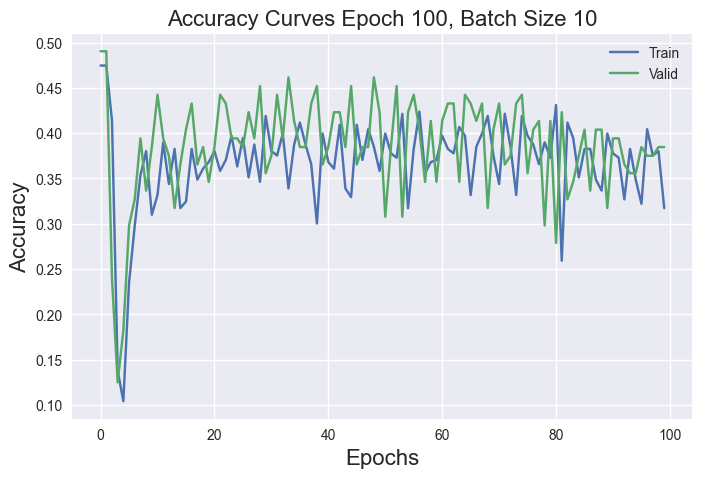

In [149]:
plt.figure(figsize=[8,5])
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves Epoch 100, Batch Size 10', fontsize=16)

plt.show()

In [150]:
features_coba = df.drop(['area','X','Y'], axis = 1)
labels_coba = df['area'].values.reshape(-1, 1)

In [151]:

features_coba

,month,is_weekend,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category,is_summer
0,mar,True,86.2,26.2,94.3,5.1,8.2,51,6.7,0.000000,0,False
1,oct,False,90.6,35.4,669.1,6.7,18.0,33,0.9,0.000000,0,False
2,oct,True,90.6,43.7,686.9,6.7,14.6,33,1.3,0.000000,0,False
3,mar,True,91.7,33.3,77.5,9.0,8.3,97,4.0,0.182322,0,False
4,mar,True,89.3,51.3,102.2,9.6,11.4,99,1.8,0.000000,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,True,81.6,56.7,665.6,1.9,27.8,32,2.7,0.000000,1,True
513,aug,True,81.6,56.7,665.6,1.9,21.9,71,5.8,0.000000,1,True
514,aug,True,81.6,56.7,665.6,1.9,21.2,70,6.7,0.000000,1,True
515,aug,True,94.4,146.0,614.7,11.3,25.6,42,4.0,0.000000,0,True


In [152]:
X_train_coba, X_test_coba, y_train_coba, y_test_coba = train_test_split(features_coba,
                                                                        labels_coba,
                                                                        test_size = 0.2,
                                                                        random_state = 42)

In [153]:
# fitting scaler

numeric_columns = ['is_summer','is_weekend','FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'size_category']
sc_features = StandardScaler()

# transforming features
X_test_coba[numeric_columns] = sc_features.fit_transform(X_test_coba[numeric_columns])
X_train_coba[numeric_columns] = sc_features.transform(X_train_coba[numeric_columns])

In [154]:
# X_train = X_train[numeric_columns]
# X_test = X_test[numeric_columns]
X_test_coba = X_test_coba[numeric_columns]
X_train_coba = X_train_coba[numeric_columns]

In [155]:
X_train_coba.head()

,is_summer,is_weekend,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
329,0.53287,0.943880,0.342959,-0.060220,0.867158,-0.249015,0.784070,-1.071784,-0.054362,-0.137348,-0.606977
173,0.53287,-1.059457,-0.057456,0.370353,0.600021,-0.465731,-0.203920,-0.279375,-1.042369,-0.137348,-0.606977
272,0.53287,-1.059457,0.312158,0.834731,0.483714,0.664288,0.221938,0.248898,-0.054362,-0.137348,-0.606977
497,0.53287,-1.059457,1.544206,1.341810,0.537142,0.664288,2.283090,-1.071784,-1.042369,-0.137348,1.647509
182,-1.87663,0.943880,-1.320305,-1.602809,-2.022846,-0.945602,-1.106740,0.645102,-1.042369,-0.137348,1.647509


In [156]:
model_coba = Sequential()

In [157]:
# input layer + 1st hidden layer
model_coba.add(Dense(6, input_dim=11, activation='relu'))
# 2nd hidden layer
model_coba.add(Dense(6, activation='relu'))
# output layer
model_coba.add(Dense(6, activation='relu'))
model_coba.add(Dropout(0.2))
model_coba.add(Dense(1, activation = 'linear'))

In [158]:
model_coba.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_140 (Dense)           (None, 6)                 72        
                                                                 
 dense_141 (Dense)           (None, 6)                 42        
                                                                 
 dense_142 (Dense)           (None, 6)                 42        
                                                                 
 dropout_35 (Dropout)        (None, 6)                 0         
                                                                 
 dense_143 (Dense)           (None, 1)                 7         
                                                                 
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________


In [159]:
model_coba.compile(optimizer = 'adam', metrics=['accuracy'], loss = 'msle')

In [160]:
history_coba = model_coba.fit(X_train_coba,
                    y_train_coba,
                    validation_data = (X_test_coba, y_test_coba), 
                    batch_size = 10,
                    epochs = 100)

Epoch 1/100
42/42 [==============================] - 2s 9ms/step - loss: 0.5205 - accuracy: 0.4092 - val_loss: 0.4656 - val_accuracy: 0.4231
Epoch 2/100
42/42 [==============================] - 0s 4ms/step - loss: 0.4405 - accuracy: 0.2954 - val_loss: 0.3976 - val_accuracy: 0.3077
Epoch 3/100
42/42 [==============================] - 0s 4ms/step - loss: 0.3673 - accuracy: 0.2954 - val_loss: 0.3618 - val_accuracy: 0.2692
Epoch 4/100
42/42 [==============================] - 0s 5ms/step - loss: 0.3524 - accuracy: 0.2470 - val_loss: 0.3400 - val_accuracy: 0.2404
Epoch 5/100
42/42 [==============================] - 0s 5ms/step - loss: 0.3339 - accuracy: 0.2446 - val_loss: 0.3164 - val_accuracy: 0.2596
Epoch 6/100
42/42 [==============================] - 0s 5ms/step - loss: 0.3129 - accuracy: 0.2203 - val_loss: 0.2941 - val_accuracy: 0.2692
Epoch 7/100
42/42 [==============================] - 0s 5ms/step - loss: 0.2830 - accuracy: 0.2446 - val_loss: 0.2701 - val_accuracy: 0.3173
Epoch 8/100
4

Epoch 59/100
42/42 [==============================] - 0s 4ms/step - loss: 0.1121 - accuracy: 0.4625 - val_loss: 0.1197 - val_accuracy: 0.4615
Epoch 60/100
42/42 [==============================] - 0s 4ms/step - loss: 0.1271 - accuracy: 0.4625 - val_loss: 0.1195 - val_accuracy: 0.4615
Epoch 61/100
42/42 [==============================] - 0s 4ms/step - loss: 0.1108 - accuracy: 0.4600 - val_loss: 0.1195 - val_accuracy: 0.4712
Epoch 62/100
42/42 [==============================] - 0s 4ms/step - loss: 0.1215 - accuracy: 0.4600 - val_loss: 0.1188 - val_accuracy: 0.4615
Epoch 63/100
42/42 [==============================] - 0s 4ms/step - loss: 0.1166 - accuracy: 0.4576 - val_loss: 0.1190 - val_accuracy: 0.4712
Epoch 64/100
42/42 [==============================] - 0s 4ms/step - loss: 0.1188 - accuracy: 0.4649 - val_loss: 0.1178 - val_accuracy: 0.4615
Epoch 65/100
42/42 [==============================] - 0s 4ms/step - loss: 0.1177 - accuracy: 0.4552 - val_loss: 0.1189 - val_accuracy: 0.4519
Epoch 

In [161]:
_, train_acc_coba = model_coba.evaluate(X_train_coba, y_train_coba, verbose=0)
_, valid_acc_coba = model_coba.evaluate(X_test_coba, y_test_coba, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc_coba, valid_acc_coba))

Train: 0.462, Valid: 0.452


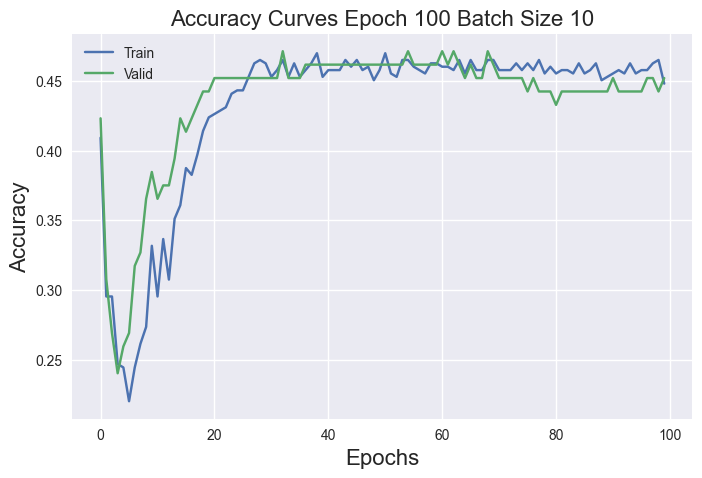

In [162]:
plt.figure(figsize=[8,5])
plt.plot(history_coba.history['accuracy'], label='Train')
plt.plot(history_coba.history['val_accuracy'], label='Valid')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves Epoch 100 Batch Size 10', fontsize=16)

plt.show()

In [163]:
X_train

,X,Y,is_summer,is_weekend,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
329,-0.293766,-0.927776,0.53287,0.943880,0.342959,-0.060220,0.867158,-0.249015,0.784070,-1.071784,-0.054362,-0.137348,-0.606977
173,-0.293766,-0.161993,0.53287,-1.059457,-0.057456,0.370353,0.600021,-0.465731,-0.203920,-0.279375,-1.042369,-0.137348,-0.606977
272,-1.130796,0.603791,0.53287,-1.059457,0.312158,0.834731,0.483714,0.664288,0.221938,0.248898,-0.054362,-0.137348,-0.606977
497,-0.712281,-0.161993,0.53287,-1.059457,1.544206,1.341810,0.537142,0.664288,2.283090,-1.071784,-1.042369,-0.137348,1.647509
182,0.124750,-0.161993,-1.87663,0.943880,-1.320305,-1.602809,-2.022846,-0.945602,-1.106740,0.645102,-1.042369,-0.137348,1.647509
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-0.293766,0.603791,0.53287,0.943880,0.989785,-0.366247,0.623858,0.911963,-0.203920,-0.411443,-0.273919,-0.137348,-0.606977
106,-0.293766,0.603791,-1.87663,-1.059457,0.096550,-1.334146,-1.915992,-0.388332,-0.118749,-0.939716,-0.548365,-0.137348,-0.606977
270,-1.130796,-1.693559,0.53287,-1.059457,0.312158,0.834731,0.483714,0.664288,0.494487,0.843205,-0.548365,-0.137348,-0.606977
435,-1.130796,0.603791,0.53287,0.943880,-0.088257,-0.373364,-0.673602,-0.682447,0.835173,0.513034,-1.261926,-0.137348,-0.606977


In [164]:
# Fit a model and plot learning curve
def fit_model(X_train, y_train, X_test, y_test, n_batch):
  # Define Model
  model = Sequential()
  model.add(Dense(6, input_dim=13, activation='relu'))
  model.add(Dense(6, activation='relu'))
  model.add(Dense(6, activation='sigmoid'))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation = 'relu'))

  # Compile Model
  model.compile(optimizer = 'adam',
                metrics=['accuracy'],
                loss = 'binary_crossentropy')
  
  # Fit Model
  history = model.fit(X_train,
                      y_train,
                      validation_data=(X_test, y_test),
                      epochs=100,
                      verbose=0,
                      batch_size=n_batch)

  # Plot Learning Curves
  plt.plot(history.history['accuracy'], label='train') 
  plt.plot(history.history['val_accuracy'], label='test') 
  plt.title('batch='+str(n_batch)) 
  plt.legend()

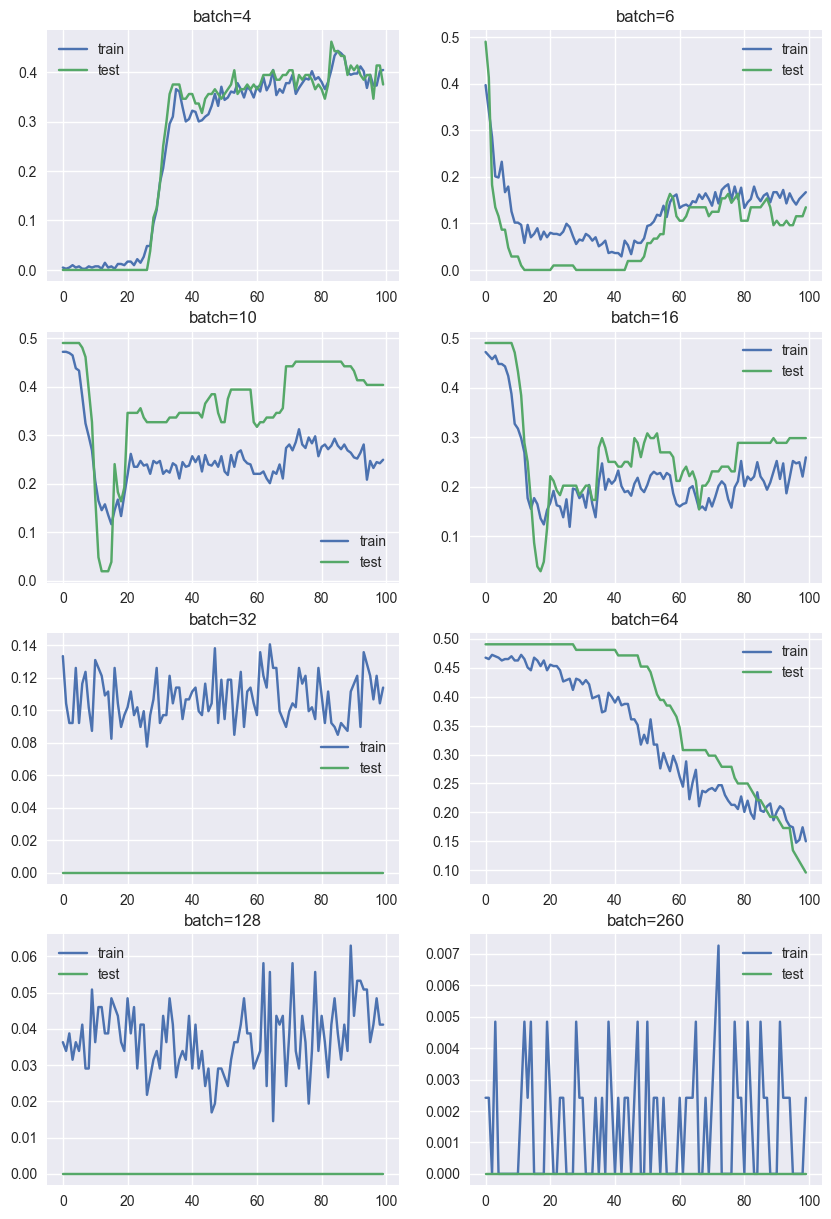

In [165]:
# Create learning curves for different batch sizes
batch_sizes = [4, 6, 10, 16, 32, 64, 128, 260]

plt.figure(figsize=(10,15))
for i in range(len(batch_sizes)):

  # Determine the Plot Number
  plot_no = 420 + (i+1)
  plt.subplot(plot_no)

  # Fit model and plot learning curves for a batch size
  fit_model(X_train, y_train, X_test, y_test, batch_sizes[i])

# Show learning curves
plt.show()

In [166]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, validX, validy, n_epoch):
    
    # define model
    model = Sequential()
    model.add(Dense(6, input_dim=13, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation = 'linear'))
    
    # compile model

    model.compile(optimizer ='adam',
                  metrics=['accuracy'],
                  loss = 'msle')
    
    # fit model
    history = model.fit(X_train,
                        y_train,
                        validation_data=(X_test, y_test),
                        epochs=n_epoch,
                        verbose=0,
                        batch_size=6)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('epoch='+str(n_epoch))
    plt.legend()

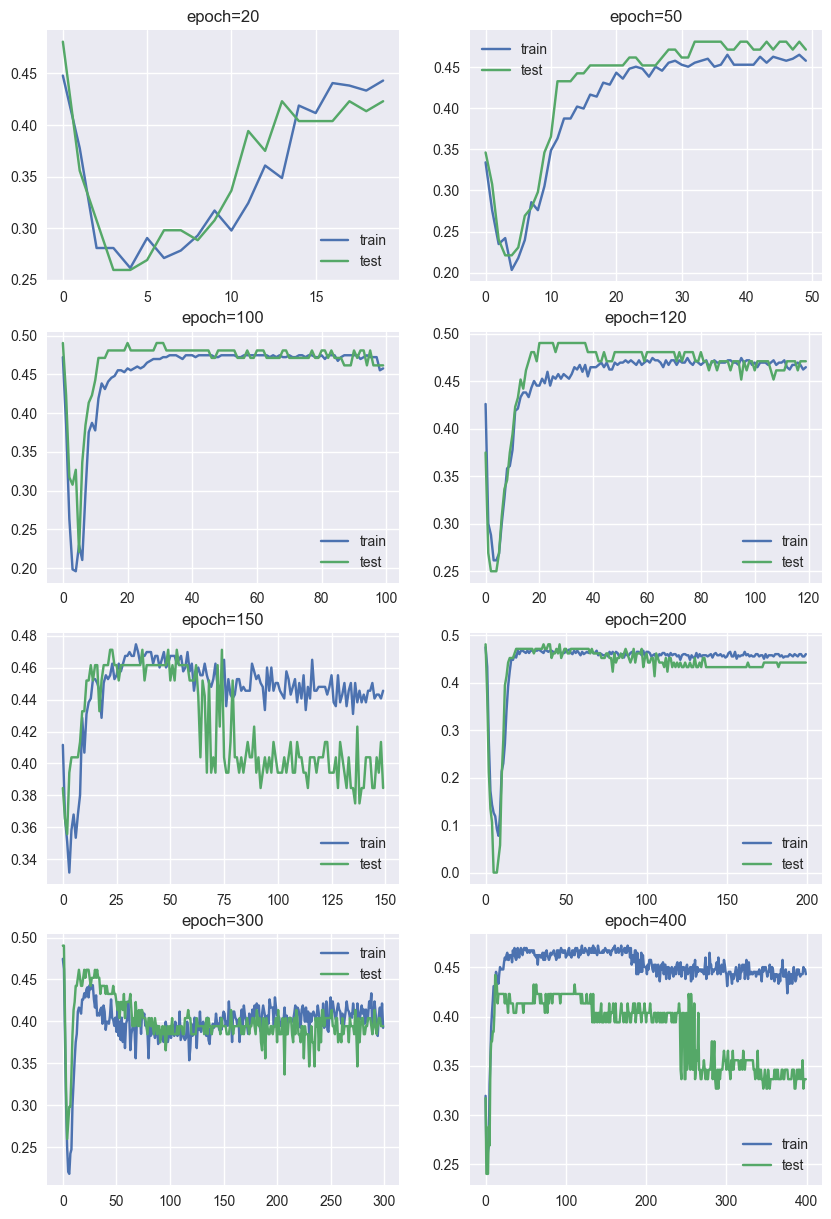

In [167]:
# Create learning curves for different batch sizes
epochs = [20, 50, 100, 120, 150, 200, 300, 400]

plt.figure(figsize=(10,15))
for i in range(len(batch_sizes)):

  # Determine the Plot Number
  plot_no = 420 + (i+1)
  plt.subplot(plot_no)

  # Fit model and plot learning curves for a batch size
  fit_model(X_train, y_train, X_test, y_test, epochs[i])

# Show learning curves
plt.show()

In [168]:
def init_model():

    # define model
    model = Sequential()
    model.add(Dense(6, input_dim=13, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation = 'linear'))
    
    model.compile(optimizer ='adam',
                  metrics=['accuracy'],
                  loss = 'msle')
    
    return model

In [169]:

# init model
model = init_model()

In [170]:
# simple early stopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   verbose=1,
                   patience=150)

In [171]:
mc = ModelCheckpoint('best_model.h5',
                     monitor='val_accuracy',
                     mode='max',
                     verbose=1,
                     save_best_only=True)

In [172]:

history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=250,
                    verbose=0,
                    batch_size=6,
                    callbacks=[es, mc])


Epoch 1: val_accuracy improved from -inf to 0.40385, saving model to best_model.h5

Epoch 2: val_accuracy did not improve from 0.40385

Epoch 3: val_accuracy did not improve from 0.40385

Epoch 4: val_accuracy did not improve from 0.40385

Epoch 5: val_accuracy did not improve from 0.40385

Epoch 6: val_accuracy did not improve from 0.40385

Epoch 7: val_accuracy did not improve from 0.40385

Epoch 8: val_accuracy did not improve from 0.40385

Epoch 9: val_accuracy did not improve from 0.40385

Epoch 10: val_accuracy did not improve from 0.40385

Epoch 11: val_accuracy did not improve from 0.40385

Epoch 12: val_accuracy did not improve from 0.40385

Epoch 13: val_accuracy improved from 0.40385 to 0.43269, saving model to best_model.h5

Epoch 14: val_accuracy did not improve from 0.43269

Epoch 15: val_accuracy improved from 0.43269 to 0.44231, saving model to best_model.h5

Epoch 16: val_accuracy improved from 0.44231 to 0.45192, saving model to best_model.h5

Epoch 17: val_accuracy 


Epoch 153: val_accuracy did not improve from 0.45192

Epoch 154: val_accuracy did not improve from 0.45192

Epoch 155: val_accuracy did not improve from 0.45192

Epoch 156: val_accuracy did not improve from 0.45192

Epoch 157: val_accuracy did not improve from 0.45192

Epoch 158: val_accuracy did not improve from 0.45192

Epoch 159: val_accuracy did not improve from 0.45192

Epoch 160: val_accuracy did not improve from 0.45192

Epoch 161: val_accuracy did not improve from 0.45192

Epoch 162: val_accuracy did not improve from 0.45192

Epoch 163: val_accuracy did not improve from 0.45192

Epoch 164: val_accuracy did not improve from 0.45192

Epoch 165: val_accuracy did not improve from 0.45192

Epoch 166: val_accuracy did not improve from 0.45192

Epoch 167: val_accuracy did not improve from 0.45192

Epoch 168: val_accuracy did not improve from 0.45192

Epoch 169: val_accuracy did not improve from 0.45192

Epoch 170: val_accuracy did not improve from 0.45192

Epoch 171: val_accuracy did

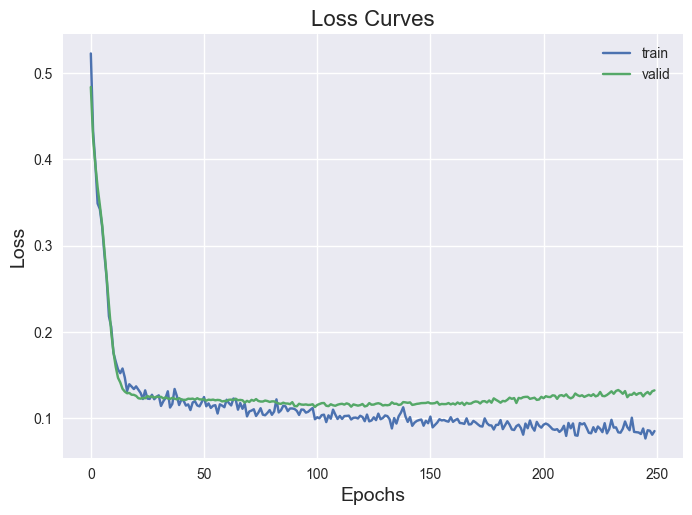

In [173]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Loss Curves', fontsize=16)
plt.show()

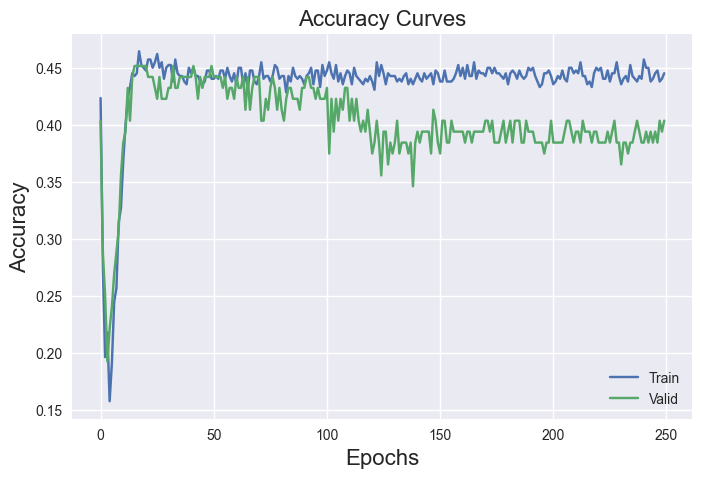

In [174]:
plt.figure(figsize=[8,5])
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

In [175]:
from keras.models import load_model
model = load_model('best_model.h5')

In [176]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.460, Valid: 0.452


In [177]:
def fit_model_with_momentum(X_train, y_train, X_test, y_test, momentum):

    # define model
    model = Sequential()
    model.add(Dense(6, input_dim=13, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation = 'linear'))

    # compile model
    opt = SGD(lr=0.1, momentum=momentum)
    model.compile(optimizer = opt,
                  metrics=['accuracy'],
                  loss = 'msle')

    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=394, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('momentum='+str(momentum))
    plt.legend()

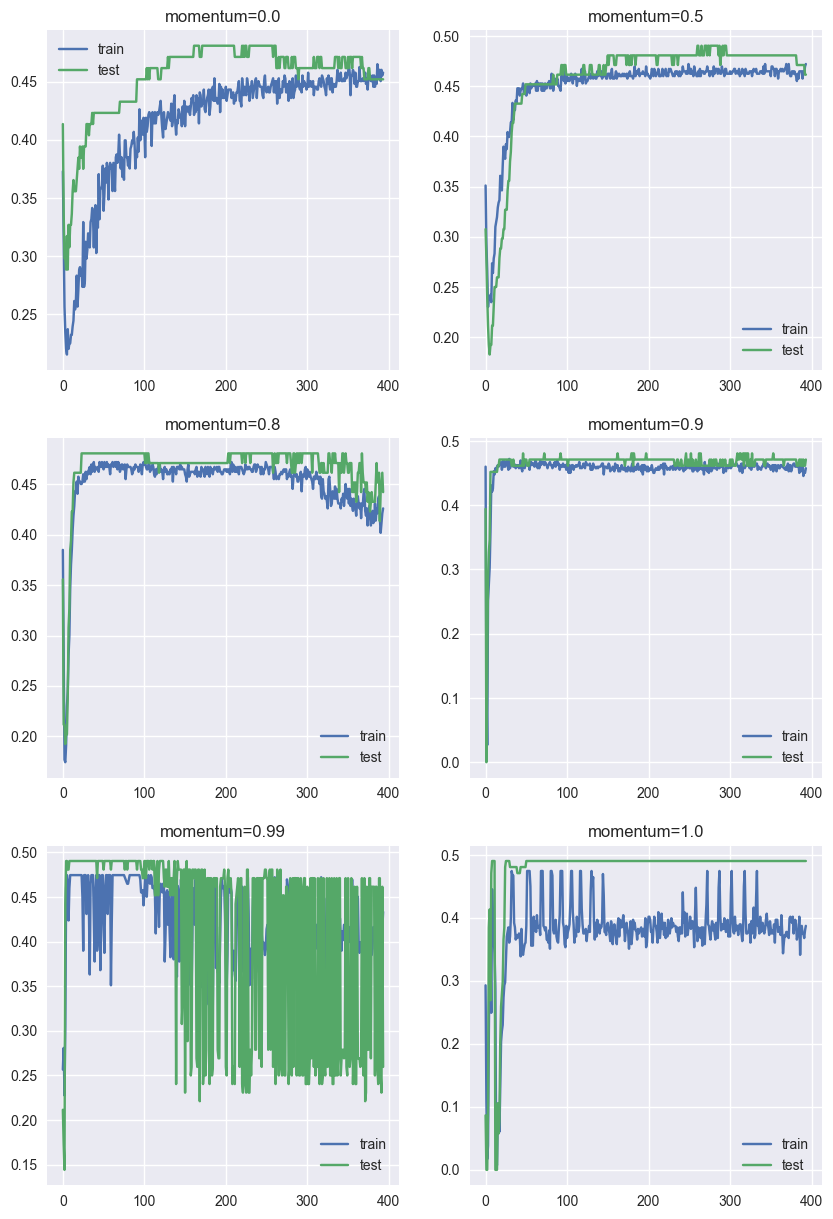

In [178]:

# create learning curves for different momentums
momentums = [0.0, 0.5, 0.8, 0.9, 0.99, 1.0] # use momentum values close to 1.0

plt.figure(figsize=(10, 15))
for i in range(len(momentums)):
    
    # determine the plot number
    plot_no = 320 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_model_with_momentum(X_train, y_train, X_test, y_test, momentums[i])

# show learning curves
plt.show()

In [179]:
def init_model():

    # define model
    model = Sequential()
    model.add(Dense(6, input_dim=13, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation = 'linear'))
    opt = SGD(lr=0.1, momentum=0.9)
    model.compile(optimizer = opt,
                  metrics=['accuracy'],
                  loss = 'msle')
    
    return model

In [180]:
# init model
model = init_model()

In [181]:
# simple early stopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   verbose=1,
                   patience=200)

In [182]:
mc = ModelCheckpoint('best_model_2.h5',
                     monitor='val_accuracy',
                     mode='max',
                     verbose=1,
                     save_best_only=True)

In [183]:
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=394,
                    verbose=0,
                    callbacks=[es, mc])


Epoch 1: val_accuracy improved from -inf to 0.49038, saving model to best_model_2.h5

Epoch 2: val_accuracy did not improve from 0.49038

Epoch 3: val_accuracy did not improve from 0.49038

Epoch 4: val_accuracy did not improve from 0.49038

Epoch 5: val_accuracy did not improve from 0.49038

Epoch 6: val_accuracy did not improve from 0.49038

Epoch 7: val_accuracy did not improve from 0.49038

Epoch 8: val_accuracy did not improve from 0.49038

Epoch 9: val_accuracy did not improve from 0.49038

Epoch 10: val_accuracy did not improve from 0.49038

Epoch 11: val_accuracy did not improve from 0.49038

Epoch 12: val_accuracy did not improve from 0.49038

Epoch 13: val_accuracy did not improve from 0.49038

Epoch 14: val_accuracy did not improve from 0.49038

Epoch 15: val_accuracy did not improve from 0.49038

Epoch 16: val_accuracy did not improve from 0.49038

Epoch 17: val_accuracy did not improve from 0.49038

Epoch 18: val_accuracy did not improve from 0.49038

Epoch 19: val_accura


Epoch 155: val_accuracy did not improve from 0.49038

Epoch 156: val_accuracy did not improve from 0.49038

Epoch 157: val_accuracy did not improve from 0.49038

Epoch 158: val_accuracy did not improve from 0.49038

Epoch 159: val_accuracy did not improve from 0.49038

Epoch 160: val_accuracy did not improve from 0.49038

Epoch 161: val_accuracy did not improve from 0.49038

Epoch 162: val_accuracy did not improve from 0.49038

Epoch 163: val_accuracy did not improve from 0.49038

Epoch 164: val_accuracy did not improve from 0.49038

Epoch 165: val_accuracy did not improve from 0.49038

Epoch 166: val_accuracy did not improve from 0.49038

Epoch 167: val_accuracy did not improve from 0.49038

Epoch 168: val_accuracy did not improve from 0.49038

Epoch 169: val_accuracy did not improve from 0.49038

Epoch 170: val_accuracy did not improve from 0.49038

Epoch 171: val_accuracy did not improve from 0.49038

Epoch 172: val_accuracy did not improve from 0.49038

Epoch 173: val_accuracy did

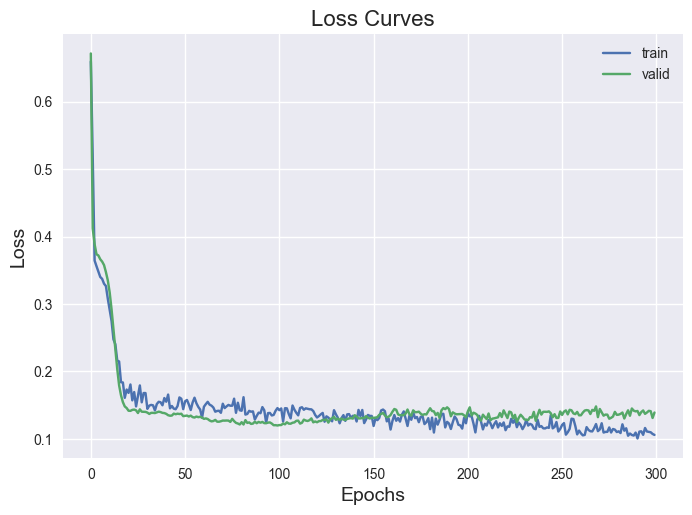

In [184]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Loss Curves', fontsize=16)
plt.show()

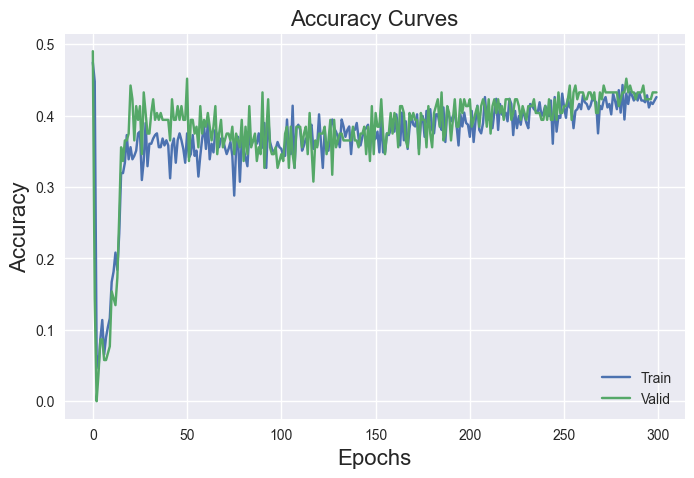

In [185]:
plt.figure(figsize=[8,5])
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

In [186]:
from keras.models import load_model
model = load_model('best_model_2.h5')

In [187]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.475, Valid: 0.490
